This notebok benchmarks different simple stencils (pointwise, 1D, etc.) using pure python code (lists), numpy arrays keeping `for` loops, and numpy parallel code.

In [1]:
import random
import math
import timeit
import numpy as np

In [2]:
from common import (
    initialize_fields,
    plot_field
)

In [3]:
NX = 128
NY = 128
NZ = 80
N_ITER = 50

# Pointwise stencils

We consider two pointwise stencil models: a simple copy, and applying the `sin` function.

$$
a(i) = b(i)
$$

$$
a(i) = \sin(b(i))
$$

In [4]:
def list_pointwise(in_field, out_field, plot=False):
    """
    The simplest pointwise stencil (copy) with list N_ITER times.
    The output is the time it took to run the stencil function in seconds.
    """   
    # Apply pointwise copy stencil
    tic = timeit.default_timer()
    for iter in range(N_ITER):
        for k in range(NZ):
            for j in range(NY):
                for i in range(NX):
                    out_field[k][j][i] = in_field[k][j][i]
        if iter < N_ITER - 1:
            in_field, out_field = out_field, in_field
    toc = timeit.default_timer()
    
    if plot:
        plot_field(out_field)
    
    return toc - tic

In [5]:
in_field, out_field = initialize_fields(NX, NY, NZ, mode="square")

In [6]:
%timeit list_pointwise(in_field.tolist(), out_field.tolist())

1.68 s ± 9.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
def list_sin_pointwise(in_field, out_field, plot=False):
    """
    Pointwise stencil with lists applying sin() to each point N_ITER times.
    The output is the time it took to run the stencil function in seconds.
    """
    # Apply pointwise copy stencil
    tic = timeit.default_timer()
    for iter in range(N_ITER):
        for k in range(NZ):
            for j in range(NY):
                for i in range(NX):
                    # numpy.sin() is ~7 times slower than math.sin() when applied to single values
                    out_field[k][j][i] = math.sin(in_field[k][j][i])
        if iter < N_ITER - 1:
            in_field, out_field = out_field, in_field
    toc = timeit.default_timer()

    if plot:
        plot_field(out_field)
        
    return toc - tic

In [8]:
# There is no need to initialize the fields again because tolist() already creates a copy
# so we are not modifying the original arrays
%timeit list_sin_pointwise(in_field.tolist(), out_field.tolist())

2.51 s ± 16.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
def array_pointwise(in_field, out_field, plot=False):
    """
    The simplest pointwise stencil (copy) with arrays N_ITER times.
    The output is the time it took to run the stencil function in seconds.
    """
    # Apply pointwise copy stencil
    tic = timeit.default_timer()
    for iter in range(N_ITER):
        for k in range(NZ):
            for j in range(NY):
                for i in range(NX):
                    out_field[k, j, i] = in_field[k, j, i]
        if iter < N_ITER - 1:
            in_field, out_field = out_field, in_field
    toc = timeit.default_timer()
    
    if plot:
        plot_field(out_field)
    
    return toc - tic

In [10]:
%%timeit
# Now we do need to initialize the fields again because we are passing the numpy
# arrays directly to the functions, so the in_field gets modified
in_field, out_field = initialize_fields(NX, NY, NZ, mode="square")
array_pointwise(in_field, out_field)

5.62 s ± 44.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
def array_sin_pointwise(in_field, out_field, plot=False):
    """
    Pointwise stencil with arrays applying sin() to each point N_ITER times.
    The output is the time it took to run the stencil function in seconds.
    """
    # Apply pointwise copy stencil
    tic = timeit.default_timer()
    for iter in range(N_ITER):
        for k in range(NZ):
            for j in range(NY):
                for i in range(NX):
                    out_field[k, j, i] = math.sin(in_field[k, j, i])
        if iter < N_ITER - 1:
            in_field, out_field = out_field, in_field
    toc = timeit.default_timer()

    if plot:
        plot_field(out_field)

    return toc - tic

In [12]:
%%timeit
in_field, out_field = initialize_fields(NX, NY, NZ, mode="square")
array_sin_pointwise(in_field, out_field)

7.94 s ± 169 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
def numpy_pointwise(in_field, out_field, plot=False):
    """
    The simplest pointwise stencil (copy) with arrays  N_ITER times.
    The output is the time it took to run the stencil function in seconds.
    """
    # Apply pointwise copy stencil
    tic = timeit.default_timer()
    for iter in range(N_ITER):
        out_field = in_field.copy()
        if iter < N_ITER - 1:
            in_field, out_field = out_field, in_field
    toc = timeit.default_timer()

    if plot:
        plot_field(out_field)
    
    return toc - tic

In [14]:
%%timeit
in_field, out_field = initialize_fields(NX, NY, NZ, mode="square")
numpy_pointwise(in_field, out_field)

11.4 ms ± 5.73 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [15]:
def numpy_sin_pointwise(in_field, out_field, plot=False):
    """
    Pointwise stencil with arrays and without X,Y,Z loops applying sin() to each point N_ITER times.
    The output is the time it took to run the stencil function in seconds.
    """    
    # Apply pointwise copy stencil
    tic = timeit.default_timer()
    for iter in range(N_ITER):
        out_field = np.sin(in_field)
        if iter < N_ITER - 1:
            in_field, out_field = out_field, in_field
    toc = timeit.default_timer()
    
    if plot:
        plot_field(out_field)

    return toc - tic

In [16]:
%%timeit 
in_field, out_field = initialize_fields(NX, NY, NZ, mode="square")
numpy_sin_pointwise(in_field, out_field)

348 ms ± 72.1 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


The conclusion of these first tests is that Python loops are **terribly slow**. And using NumPy arrays incorrectly, i.e., keeping the `for` loops makes things even worse.

However, if we use **NumPy arrays** correctly we increase a lot the performance. The simplest pointwise stencil (copy) is **~150x faster**, and the pointwise stencil applying `sin()` is **~7x faster**.

# 1D stencils

1D stencils updating with values from the same row or same colum only and with periodic boundary conditions.

$$
a(i,j) = \frac{1}{2} \Big[b(i+1,j) - b(i,j)\Big]
$$

$$
a(i,j) = \frac{1}{2} \Big[b(i,j+1) - b(i,j)\Big]
$$

The facotr 1/2 is to avoid getting huge numbers when `N_ITER` is large with the simple initialization patterns we defined before.

###  Same column: $a(i,j) = \frac{1}{2} \Big[b(i+1,j) - b(i,j)\Big]$

In [17]:
def list_1D_same_col_row_update(in_field, out_field, plot=False):
    # Apply 1D stencil
    tic = timeit.default_timer()
    for iter in range(N_ITER):
        for k in range(NZ):
            for i in range(NX - 1):
                for j in range(NY):
                    out_field[k][j][i] = 0.5 * (in_field[k][j][i+1] - in_field[k][j][i])
                    # Periodic boundary condition
                    out_field[k][j][NX-1] = 0.5 * (in_field[k][j][0] - in_field[k][j][NX-1])
        if iter < N_ITER - 1:
            in_field, out_field = out_field, in_field
    toc = timeit.default_timer()

    if plot:
        plot_field(out_field)
        
    return toc - tic

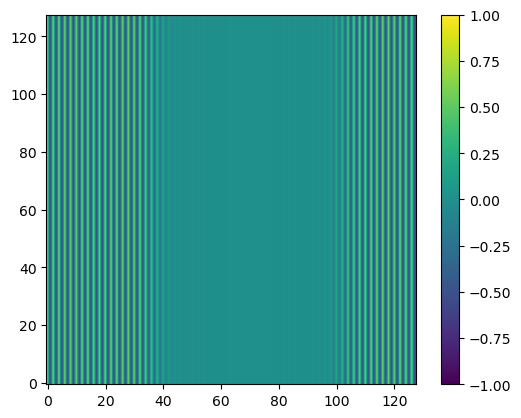

In [18]:
in_field, out_field = initialize_fields(NX, NY, NZ, mode="vertical-bars")
list_1D_same_col_row_update(in_field.tolist(), out_field.tolist(), plot=True);

In [19]:
%timeit list_1D_same_col_row_update(in_field.tolist(), out_field.tolist())

8.03 s ± 81.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [20]:
def list_1D_same_col_col_update(in_field, out_field, plot=False):
    # Apply 1D stencil
    tic = timeit.default_timer()
    for iter in range(N_ITER):
        for k in range(NZ):
            for j in range(NY):
                for i in range(NX - 1):
                    out_field[k][j][i] = 0.5 * (in_field[k][j][i+1] - in_field[k][j][i])
                out_field[k][j][NX-1] = 0.5 * (in_field[k][j][0] - in_field[k][j][NX-1])
        if iter < N_ITER - 1:
            in_field, out_field = out_field, in_field
    toc = timeit.default_timer()

    if plot:
        plot_field(out_field)
        
    return toc - tic

In [21]:
%timeit list_1D_same_col_col_update(in_field.tolist(), out_field.tolist())

3.24 s ± 54.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


If our stencil update only uses values from the same row, we should loop the field row-wise to maximize the cache hits. Working with python lists the performance difference is very noticeable.

In [22]:
def array_1D_same_col_row_update(in_field, out_field, plot=False):
    # Apply 1D stencil
    tic = timeit.default_timer()
    
    for iter in range(N_ITER):
        for k in range(NZ):
            for i in range(NX - 1):
                for j in range(NY):
                    out_field[k, j, i] = 0.5 * (in_field[k, j, i+1] - in_field[k, j, i])
                    # Periodic boundary condition
                    out_field[k, j, NX-1] = 0.5 * (in_field[k, j, 0] - in_field[k, j, NX-1])
        
        if iter < N_ITER - 1:
            in_field, out_field = out_field, in_field
    
    toc = timeit.default_timer()

    if plot:
        plot_field(out_field)
        
    return toc - tic

In [23]:
%%timeit
in_field, out_field = initialize_fields(NX, NY, NZ, mode="vertical-bars")
array_1D_same_col_row_update(in_field, out_field)

25.7 s ± 1.35 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [24]:
def array_1D_same_col_col_update(in_field, out_field, plot=False):
    # Apply 1D stencil
    tic = timeit.default_timer()
    
    for iter in range(N_ITER):
        for k in range(NZ):
            for j in range(NY):
                for i in range(NX - 1):
                    out_field[k, j, i] = 0.5 * (in_field[k, j, i+1] - in_field[k, j, i])
                    # Periodic boundary condition
                out_field[k, j, NX-1] = 0.5 * (in_field[k, j, 0] - in_field[k, j, NX-1])
        
        if iter < N_ITER - 1:
            in_field, out_field = out_field, in_field
    
    toc = timeit.default_timer()

    if plot:
        plot_field(out_field)
        
    return toc - tic

In [25]:
%%timeit
in_field, out_field = initialize_fields(NX, NY, NZ, mode="vertical-bars")
array_1D_same_col_col_update(in_field, out_field)

12.1 s ± 247 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [26]:
def numpy_1D_same_col(in_field, out_field, plot=False):    
    # Apply 1D stencil
    tic = timeit.default_timer()
    for iter in range(N_ITER):
        out_field[:, :, :-1] = 0.5 * (in_field[:, :, 1:] - in_field[:, :, :-1])
        # Periodic boundary condition
        out_field[:, :, -1] = 0.5 * (in_field[:, :, 0] - in_field[:, :, -1])
        if iter < N_ITER - 1:
            in_field, out_field = out_field, in_field
    toc = timeit.default_timer()

    if plot:
        plot_field(out_field)

    return toc - tic

In [27]:
%%timeit
in_field, out_field = initialize_fields(NX, NY, NZ, mode="vertical-bars", order="C")
numpy_1D_same_col(in_field, out_field)

56.7 ms ± 385 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [28]:
%%timeit 
in_field, out_field = initialize_fields(NX, NY, NZ, mode="vertical-bars", order="F")
numpy_1D_same_col(in_field, out_field)

34 ms ± 402 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


By default, NumPy arrays are stored row-wise (C style), but this can be changed using the argument `order`. That is why we see a performance increase if we explicitly initialized the fields col-wise (Fortran style).

## Same row: $a(i,j) = \frac{1}{2} \Big[b(i,j+1) - b(i,j)\Big]$

In [29]:
def list_1D_same_row_row_update(in_field, out_field, plot=False):
    # Apply 1D stencil
    tic = timeit.default_timer()
    for iter in range(N_ITER):
        for k in range(NZ):
            for i in range(NX):
                for j in range(NY-1):
                    out_field[k][j][i] = 0.5 * (in_field[k][j+1][i] - in_field[k][j][i])
                out_field[k][NY-1][i] = 0.5 * (in_field[k][0][i] - in_field[k][NY-1][i])
        if iter < N_ITER - 1:
            in_field, out_field = out_field, in_field
    toc = timeit.default_timer()

    if plot:
        plot_field(out_field)
        
    return toc - tic

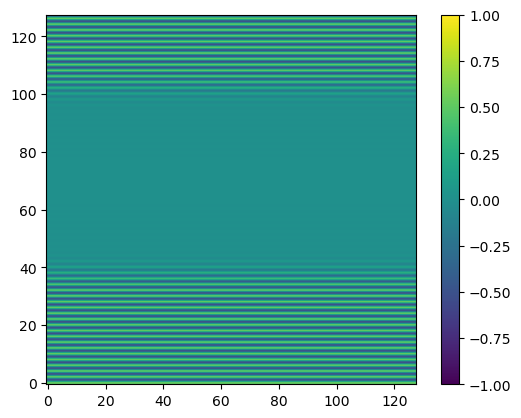

In [30]:
in_field, out_field = initialize_fields(NX, NY, NZ, mode="horizontal-bars", order="C")
list_1D_same_row_row_update(in_field.tolist(), out_field.tolist(), plot=True);

In [31]:
%timeit list_1D_same_row_row_update(in_field.tolist(), out_field.tolist())

4.03 s ± 102 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [32]:
def list_1D_same_row_col_update(in_field, out_field, plot=False):
    # Apply 1D stencil
    tic = timeit.default_timer()
    for iter in range(N_ITER):
        for k in range(NZ):
            for j in range(NY-1):
                for i in range(NX):
                    out_field[k][j][i] = 0.5 * (in_field[k][j+1][i] - in_field[k][j][i])
                    out_field[k][NY-1][i] = 0.5 * (in_field[k][0][i] - in_field[k][NY-1][i])
        if iter < N_ITER - 1:
            in_field, out_field = out_field, in_field
    toc = timeit.default_timer()

    if plot:
        plot_field(out_field)
        
    return toc - tic

In [33]:
%timeit list_1D_same_row_col_update(in_field.tolist(), out_field.tolist())

7.03 s ± 109 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Similary, if our stencil update only uses values from the same col, we should loop the field col-wise to benefit from the cache.

In [34]:
def array_1D_same_row_row_update(in_field, out_field, plot=False):
    # Apply 1D stencil
    tic = timeit.default_timer()
    for iter in range(N_ITER):
        for k in range(NZ):
            for i in range(NX):
                for j in range(NY-1):
                    out_field[k, j, i] = 0.5 * (in_field[k, j+1, i] - in_field[k, j, i])
                out_field[k, NY-1, i] = 0.5 * (in_field[k, 0, i] - in_field[k, NY-1, i])
        if iter < N_ITER - 1:
            in_field, out_field = out_field, in_field
    toc = timeit.default_timer()

    if plot:
        plot_field(out_field)
        
    return toc - tic

In [35]:
%%timeit
in_field, out_field = initialize_fields(NX, NY, NZ, mode="horizontal-bars")
array_1D_same_row_row_update(in_field, out_field)

14.1 s ± 945 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [36]:
def array_1D_same_row_col_update(in_field, out_field, plot=False):
    tic = timeit.default_timer()

    # Apply 1D stencil
    for iter in range(N_ITER):
        for k in range(NZ):
            for j in range(NY - 1):
                for i in range(NX):
                    out_field[k, j, i] = 0.5 * (in_field[k, j+1, i] - in_field[k, j, i])
                    out_field[k, NY-1, i] = 0.5 * (in_field[k, 0, i] - in_field[k, NY-1, i])
        
        if iter < N_ITER - 1:
            in_field, out_field = out_field, in_field
    
    toc = timeit.default_timer()

    if plot:
        plot_field(out_field)
        
    return toc - tic

In [37]:
%%timeit
in_field, out_field = initialize_fields(NX, NY, NZ, mode="horizontal-bars")
array_1D_same_row_col_update(in_field, out_field)

24.9 s ± 31.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [38]:
def numpy_1D_same_row(in_field, out_field, plot=False):    
    # Apply 1D stencil
    tic = timeit.default_timer()
    for iter in range(N_ITER):
        out_field[:, :-1, :] = 0.5 * (in_field[:, 1:, :] - in_field[:, :-1, :])
        # Periodic boundary condition
        out_field[:, -1, :] = 0.5 * (in_field[:, 0, :] - in_field[:, -1, :])
        if iter < N_ITER - 1:
            in_field, out_field = out_field, in_field
    toc = timeit.default_timer()

    if plot:
        plot_field(out_field)

    return toc - tic

In [39]:
%%timeit 
in_field, out_field = initialize_fields(NX, NY, NZ, mode="horizontal-bars", order="C")
numpy_1D_same_row(in_field, out_field)

31.1 ms ± 341 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [40]:
%%timeit 
in_field, out_field = initialize_fields(NX, NY, NZ, mode="horizontal-bars", order="F")
numpy_1D_same_row(in_field, out_field)

31.4 ms ± 262 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


This result is a bit surprising because we cannot replicate the effect observed before with the 1D stencil using values from the same column. In this case, how fields are stored in memory almost does not impact the time.

TODO: this is weird!

## 2D stencil

The last stencil we will check is the 4th-order non-monotonic diffusion we used during the course, which is defined in terms of the Laplace operator as

$$
a(i, j) = \Delta(\Delta(b(i, j)))
$$

Since it is already clear from the experiments with pointwise and 1D stencils, that python `for` loops are very slow. Here we will only run the numpy implementation from `stencil2d.py` given in the course. This will set the base time to improve using the different high-level programming techniques available in Python (which will be tested in different notebooks).

In [41]:
from stencil2d import apply_diffusion as numpy_2D

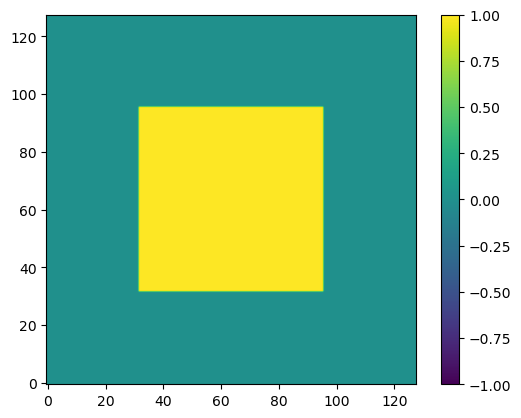

In [42]:
in_field, out_field = initialize_fields(NX, NY, NZ, mode="square")
plot_field(in_field)

In [43]:
numpy_2D(in_field, out_field, num_halo=2, num_iter=N_ITER)

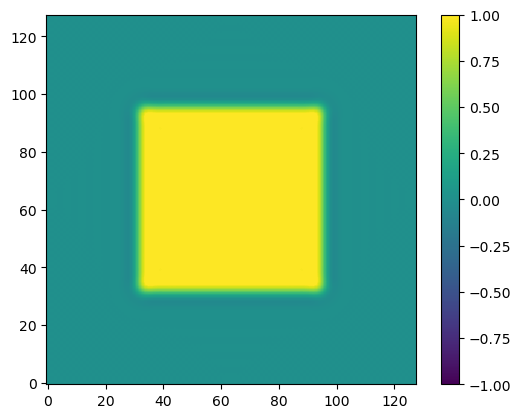

In [44]:
plot_field(out_field)

In [45]:
%%timeit
in_field, out_field = initialize_fields(NX, NY, NZ, mode="square")
numpy_2D(in_field, out_field, num_halo=2, num_iter=N_ITER)

401 ms ± 4.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Appendices

## np.sin() vs math.sin()

There is no doubt that `np.sin()` is faster than `math.sin()` when applied to large NumPy arrays. But this function has an overhead cost when applied to single elements. Here we show that `math.sin()` is more efficient than `np.sin()` when applied to 4 or less elements. However, the overhead of a Python loop is even worse than the overhead of `np.sin()`.

In [46]:
rng = np.random.default_rng()
x = rng.random(100)

`np.sin()` is ~7.7 times slower than `math.sin()` when applied to a single value.

In [47]:
%timeit math.sin(x[0])

43.8 ns ± 0.552 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [48]:
%timeit np.sin(x[0])

340 ns ± 2.47 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


However, we loose part of this performance the moment we use a single for loop.

In [49]:
%timeit for i in range(1): math.sin(x[i])

90.1 ns ± 0.483 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [50]:
%timeit np.sin(x[:1])

258 ns ± 1.69 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In any case, even without for loops, `math.sin()` becomes slower than `np.sin()` the moment we need to compute more than four values.

In [51]:
%timeit math.sin(x[0]), math.sin(x[1]), math.sin(x[2]), math.sin(x[3]), math.sin(x[4]), math.sin(x[5])

259 ns ± 1.14 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [52]:
%timeit np.sin(x[:6])

279 ns ± 1.22 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


This is because `np.sin()` computes these values in parallel, while the `math.sin()` computes them sequentially.

## Different dtypes affect performance

NumPy supports defines different data type (dtype) objects which describes how the bytes in the fixed-size block of memory corresponding to an array item should be interpreted. By default, NumPy will choose a proper dtype depending on the input passing to the constructor. However, we are free to change this default behaviour by specifying manually the dtype. As expected, and quickly demonstrated here using the `numpy_sin_pointwise()` function, this choice can also impact the performance of our stencil model.

In [53]:
dtypes_ = [np.float16, np.float32, np.float64, np.float128]

In [54]:
%%timeit
in_field, out_field = initialize_fields(NX, NY, NZ, mode="square", dtype=dtypes_[0])
numpy_sin_pointwise(in_field, out_field)

14.7 ms ± 75.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [55]:
%%timeit
in_field, out_field = initialize_fields(NX, NY, NZ, mode="square", dtype=dtypes_[1])
numpy_sin_pointwise(in_field, out_field)

20.9 ms ± 81.5 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [56]:
%%timeit
in_field, out_field = initialize_fields(NX, NY, NZ, mode="square", dtype=dtypes_[2])
numpy_sin_pointwise(in_field, out_field)

325 ms ± 3.25 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [57]:
%%timeit
in_field, out_field = initialize_fields(NX, NY, NZ, mode="square", dtype=dtypes_[3])
numpy_sin_pointwise(in_field, out_field)

952 ms ± 3.63 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


More numerical precision implies moving more data from and to memory.